You've been given a file helpfully named `fakeData.txt`. Your mission, should you choose to accept it, is to:

- Read in that file
- Seperate it into two sets using the "bad" column (-1 means bad)
- Plot the good data
- Plot the bad data using "X"s to clearly denote it
- Fit a line to the data using an appropriate polynomial function

You should accept the mission, it is a completion grade. The purpose of this assignment is to see how much you remember from your intro to programming class, and to see if you developed and very good or very bad habits. Please do your best to demonstrate good habits! (e.g., descriptive variable names, readable code, maybe even proper PEP 8 coding style!)

You may use any resources at your disposal, except your friends please. I want to see what **YOU** remember. But your textbook, the internet, any lecture notes or homework you have from your previous all, are all free game as reference for this assignment. Just try to avoid copy-pasting too much (I'll be able to tell).

In [45]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.optimize

In [51]:
def exponential(x,a,b,c,d):
    return a * (np.exp(b*x + c)) + d

def binomial(x,a,b,c):
    return a*(x**2)+(b*x)+c

In [52]:
#First, let's turn the data into strings we can manipulate

dataFile = open('fakeData.txt', 'r')
title = dataFile.readline() #This will trim the labels off 
xVals = []
yVals = []
badVals = []
for lines in dataFile:
    lines = lines.strip()
    columns = lines.split()
    xVals.append(columns[0])
    yVals.append(columns[1])
    badVals.append(columns[2])



In [53]:
#Turning each list into a list of numbers

for i in range(len(xVals)):
    xVals[i] = xVals[i].replace(",","")
    xVals[i] = float(xVals[i])
    
    yVals[i] = yVals[i].replace(",","")
    yVals[i] = float(yVals[i])
    
    badVals[i] = badVals[i].replace(",","")
    badVals[i] = int(badVals[i])
    
#Now let's sort the data into good and bad
goodX = []
goodY = []
badX = []
badY = []
for i in range(len(badVals)):
    if badVals[i] == 1:
        goodX.append(xVals[i])
        goodY.append(yVals[i])
    else:
        badX.append(xVals[i])
        badY.append(yVals[i])


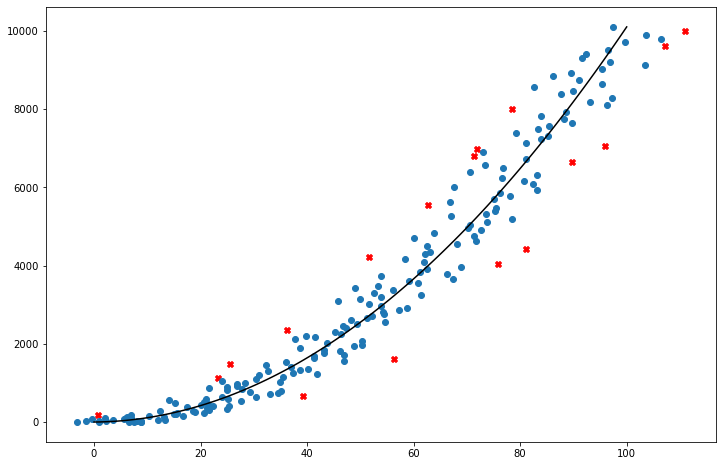

In [57]:
xfits = np.linspace(0,100,100)
yfits = binomial(xfits,1,1,1)
popt, pcov = scipy.optimize.curve_fit(binomial,xfits,yfits)

myPlot = plt.figure(figsize=(12,8))
ax = myPlot.add_subplot(111)
ax.scatter(badX,badY, marker = 'X', c = 'r')
ax.scatter(goodX,goodY)
ax.plot(xfits,binomial(xfits, *popt), c ='black')
